# Ajuste de modelos via cuadrados mínimos usando PyTorch

## Ejercicio 1)

Instale `pytorch` usando el comando de bash

In [1]:
#!pip3 install torch torchvision torchaudio torchviz

## Ejercicio 2)

**1)** Importe librerias `numpy`, `scipy` y `matplotlib`.

**2)** Importe librerias de `pytorch`.
Para ello, vea el colab `pytorch-tutorial-1-tensores.ipynb`.

In [2]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [4]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot
import torch.optim as optim

## Ejercicio 3)

Considere una secuencia de mediciones $(x_i,y_i)$ con $i=1,...,m$ de una variable independiente $x$ y una variable dependiente $y$.

Considere un modelo

$$
y = f(x,w) = \exp(-w_0 x)\sin(w_1x)
$$

donde $w=(w_0,w_1)$ es el vector de los parámetros del modelo.

**1)** Use `np.linspace` para generar un vector de 20 valores de $x$ en $[0,3]$.

**2)** Con $w=(0.5,4)$, use los valores de $x$ para generar un vector de 30 valores de $y$, i.e. un vector de componentes $y_i = f(x_i,w)$.

**3)** Genere valores experimentales *sintéticos* agregando ruido al vector $y$ generado en **2)**, agregandole números aleatorios obtenidos de una distribución normal de media $0$ y desviación estandard $0.1$.

**4)** Grafique los datos *experimentales* usando puntos.
Simultaneamente, grafique la curva *exacta*, interpolando sobre 300 puntos en el mismo rango.

In [ ]:
# 3.1)

w_exacta = [0.5, 4.0]
x_data = np.linspace(0, 3, 20)
y_data = np.exp(-w_exacta[0]*x_data)*np.sin(w_exacta[1]*x_data) + 0.1*np.random.normal(size=len(x_data))

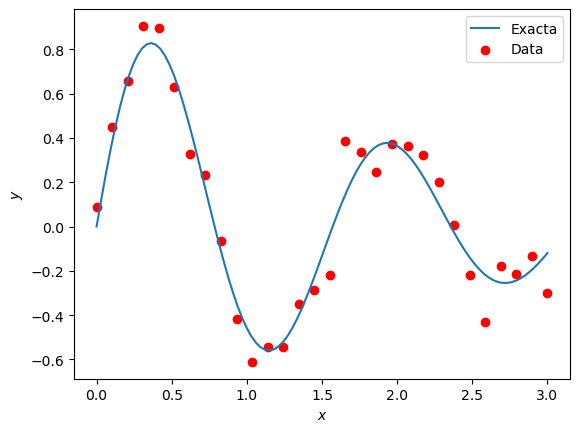

In [11]:
x_exacta = np.linspace(0, 3, 100)
y_exacta = np.exp(-w_exacta[0]*x_exacta)*np.sin(w_exacta[1]*x_exacta)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_exacta, y_exacta, label='Exacta')
plt.scatter(x_data, y_data, label='Data', c='r')
plt.legend()
plt.show()

## Ejercicio 4)

El ajuste de un modelo por cuadrados mínimos, consiste en encontrar el vector de parámetros que minimiza la suma de los cuadrados de las diferencias entre los datos y las predicciones del modelo.
Más precisamente, consiste en minimizar

$$
E(w) = \sum_i (f(x_i,w)-y_i)^2
$$

con respecto a $w$.

**1)** Minimice $E(w)$ utilizando el algoritmo del descenso por el gradiente.
Implemente el algoritmo utilizando `pytorch`. Saque ventaja de la capacidad de `pytorch` de calcular gradientes de manera automática. Utilice un learning rate $\eta=0.001$ y como valores iniciales de $w$, los originales, pero levemente perturbados con un números aleatorios obtenidos de una distribución normal de media $1$ y desviación estandard $0.25$.

**2)** Grafique, utilizando los mismos 300 puntos de antes, la curva ajustada por el algoritmo anterior.

In [13]:
# 4.1)

lr = 1e-3
num_epocas = 3000

w_ini = [p*(1+0.25*np.random.normal()) for p in w_exacta]

w_torch = [torch.tensor([p], requires_grad=True, dtype=torch.float) for p in w_ini]
x_torch = torch.tensor(x_data)
y_torch = torch.tensor(y_data)

print(f'Inicial w_torch={[p.item() for p in w_torch]}')

for epoca in range(num_epocas):
    f_torch = torch.exp(-w_torch[0]*x_torch)*torch.sin(w_torch[1]*x_torch)
    loss = ((f_torch - y_torch)**2).sum()

    loss.backward()

    if epoca%300==0:
        print(f'epoca={epoca}   loss={loss.item()}   w_torch={[p.item() for p in w_torch]}')

    with torch.no_grad():
        for p in w_torch:
            p -= lr*p.grad

    for p in w_torch:
        p.grad.zero_()

print(f'w_exacta={w_exacta}')

Inicial w_torch=[0.4257599115371704, 4.865572452545166]
epoca=0   loss=4.53257668322591   w_torch=[0.4257599115371704, 4.865572452545166]
epoca=300   loss=0.3054122806208893   w_torch=[0.48609820008277893, 4.03973388671875]
epoca=600   loss=0.28589865569121625   w_torch=[0.4511021077632904, 3.9988605976104736]
epoca=900   loss=0.2858928646297937   w_torch=[0.4506075382232666, 3.998105525970459]
epoca=1200   loss=0.2858928634592778   w_torch=[0.4506026804447174, 3.9980995655059814]
epoca=1500   loss=0.2858928634592778   w_torch=[0.4506026804447174, 3.9980995655059814]
epoca=1800   loss=0.2858928634592778   w_torch=[0.4506026804447174, 3.9980995655059814]
epoca=2100   loss=0.2858928634592778   w_torch=[0.4506026804447174, 3.9980995655059814]
epoca=2400   loss=0.2858928634592778   w_torch=[0.4506026804447174, 3.9980995655059814]
epoca=2700   loss=0.2858928634592778   w_torch=[0.4506026804447174, 3.9980995655059814]
w_exacta=[0.5, 4.0]


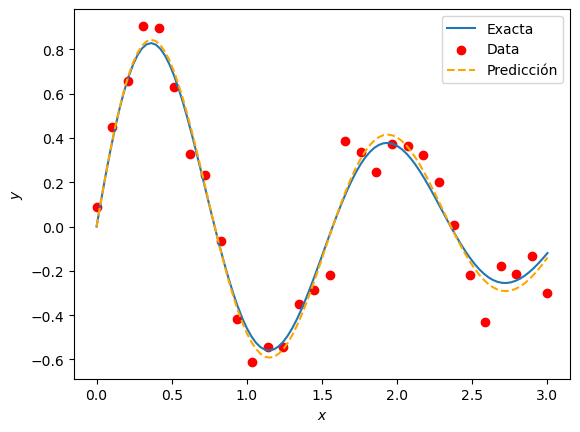

In [18]:
# 4.2)
w_ajust1 = [p.item() for p in w_torch]
y_ajust1_data = np.exp(-w_ajust1[0]*x_data)*np.sin(w_ajust1[1]*x_data)
y_ajust1_pred = np.exp(-w_ajust1[0]*x_exacta)*np.sin(w_ajust1[1]*x_exacta)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_exacta, y_exacta, label='Exacta')
plt.scatter(x_data, y_data, label='Data', c='r')
plt.plot(x_exacta, y_ajust1_pred, label='Predicción', linestyle='--', c='orange')
plt.legend()
plt.show()

## Ejercicio 5)

**1)** Repita el ejercicio anterior, pero ahora ajustando el modelo

$$
f(x,w) = \exp(-w_0x+w_2)\sin(w_1x+w_3)
$$

i.e. un modelo con dos parámetros ajustables extra.

**2)** Calcule el error cuadratico medio de ambos modelos, sobre los 30 puntos de entrenamiento y sobre los 300 puntos del la curva exacta.

In [19]:
# 5.1)

lr = 1e-3
num_epocas = 5000

w_ini = [p*(1+0.5*np.random.normal()) for p in w_exacta]
w_torch = [torch.tensor([p], requires_grad=True, dtype=torch.float) for p in w_ini + [0.1, 0.1]]
x_torch = torch.tensor(x_data)
y_torch = torch.tensor(y_data)

print(f'Inicial w_torch={[p.item() for p in w_torch]}')

for epoca in range(num_epocas): 
    f_torch = torch.exp(-w_torch[0]*x_torch+w_torch[2])*torch.sin(w_torch[1]*x_torch+w_torch[3])
    loss = ((f_torch - y_torch)**2).sum()

    loss.backward()

    if epoca%300==0:
        print(f'epoca={epoca}   loss={loss.item()}   w_torch={[p.item() for p in w_torch]}')

    with torch.no_grad():
        for p in w_torch:
            p -= lr*p.grad

    for p in w_torch:
        p.grad.zero_()

print(f'w_exacta={w_exacta}')   

Inicial w_torch=[0.3775253891944885, 1.9177297353744507, 0.10000000149011612, 0.10000000149011612]
epoca=0   loss=10.517027427608902   w_torch=[0.3775253891944885, 1.9177297353744507, 0.10000000149011612, 0.10000000149011612]
epoca=300   loss=3.526278121674988   w_torch=[1.1185932159423828, 2.2748634815216064, -0.28836920857429504, 0.5969100594520569]
epoca=600   loss=2.854957975638121   w_torch=[1.1473586559295654, 2.6708312034606934, -0.1836368441581726, 0.7475432753562927]
epoca=900   loss=2.046097723263741   w_torch=[0.9543269872665405, 3.098165988922119, -0.06509841233491898, 0.7004898190498352]
epoca=1200   loss=0.8358120815650509   w_torch=[0.6000441312789917, 3.5310561656951904, 0.003894511377438903, 0.4971505403518677]
epoca=1500   loss=0.36813342760694645   w_torch=[0.4539216458797455, 3.7736411094665527, -0.0241243913769722, 0.2759750485420227]
epoca=1800   loss=0.2868078484399702   w_torch=[0.43754592537879944, 3.8736608028411865, -0.024644413962960243, 0.16367708146572113]

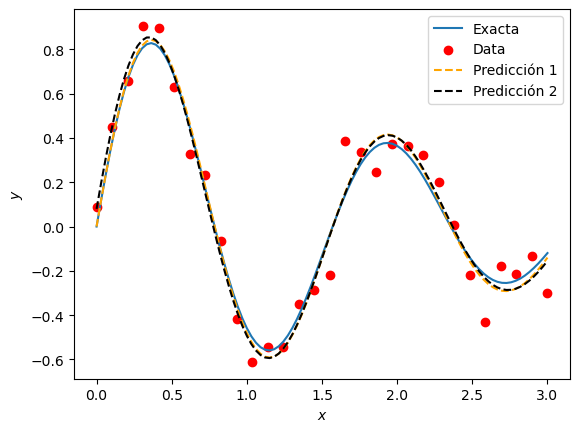

In [20]:
w_ajust2 = [p.item() for p in w_torch]
y_ajust2_data = np.exp(-w_ajust2[0]*x_data+w_ajust2[2])*np.sin(w_ajust2[1]*x_data+w_ajust2[3])
y_ajust2_pred = np.exp(-w_ajust2[0]*x_exacta+w_ajust2[2])*np.sin(w_ajust2[1]*x_exacta+w_ajust2[3])

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_exacta, y_exacta, label='Exacta')
plt.scatter(x_data, y_data, label='Data', c='r')
plt.plot(x_exacta, y_ajust1_pred, label='Predicción 1', linestyle='--', c='orange')
plt.plot(x_exacta, y_ajust2_pred, label='Predicción 2', linestyle='--', c='black')
plt.legend()
plt.show()

In [21]:
# 5.2)

((y_ajust1_data-y_data)**2).sum()

0.2858928634592778

In [23]:
((y_ajust1_pred-y_exacta)**2).sum()

0.05375665355725287

In [24]:
((y_ajust2_data-y_data)**2).sum()

0.26823434512125444

In [25]:
((y_ajust2_pred-y_exacta)**2).sum()

0.10523603711319632